In [1]:
#Carga de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cufflinks as cf
from IPython.display import display,HTML

In [3]:
#Carga de archivo CSV
data= pd.read_csv("CountryTable.csv")
data

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [5]:
#Identificación de valores nulos
null=data.isnull(). sum()
null

code                  0
name                  0
continent             0
region                0
surface_area          0
independence_year    47
population            0
life_expectancy      17
gnp                   0
gnp_old              61
local_name            1
government_form       0
head_of_state         3
capital               7
code2                 1
dtype: int64

3. Aplicar los siguientes métodos para reemplazar valores nulos en cada columna:

In [10]:
#“independence_year”: Rellenar con el valor “1900”
data["independence_year"]= data["independence_year"].fillna(1900)

#“life_expectancy”: Rellenar con el valor “Media” de la columna
data["life_expectancy"]=data["life_expectancy"].fillna(round(data["life_expectancy"].mean(),1))

#“gnp_old ”: Rellenar con el valor “Mediana” de la columna
data["gnp_old"]=data["gnp_old"].fillna(round(data["gnp_old"].median(),1))

#“local_name”: Rellenar con el string “Inexistente”
data["local_name"]=data["local_name"].fillna("Inexistente")

#“head_of_state”: Rellenar con el string “Desconocido”
data["head_of_state"]=data["head_of_state"].fillna("Desconocido")

#“capital ”: Rellenar con el valor “0”
data["capital"]=data["capital"].fillna(0)

#“code2”: Rellenar con el string “NA”
data["code2"]=data["code2"].fillna("NA")

In [8]:
#Identificación de valores nulos
null=data.isnull(). sum()
null

code                 0
name                 0
continent            0
region               0
surface_area         0
independence_year    0
population           0
life_expectancy      0
gnp                  0
gnp_old              0
local_name           0
government_form      0
head_of_state        0
capital              0
code2                0
dtype: int64

4. Aplicar método de distribución normal para identificar Outliers, tomando como limites 2 desviaciones estándar, exclusivamente para las columnas “gnp old” y “population”, obtener los diagramas de caja de cada una respectivamente.


In [11]:
#Creación de una copia para la base de datos
copia = data.copy()

GNP OLD

In [13]:
reto2=copia["gnp_old"]
limitesuperior=reto2.mean()+2*reto2.std()
limiteinferior=reto2.mean()-2*reto2.std()
print("Limite superior permitido", limitesuperior)
print("Limite inferior permitido",limiteinferior)

Limite superior permitido 1375629.5313349972
Limite inferior permitido -1124761.0041383444


In [14]:
#Identificación de Outliers
outliers= copia [(reto2>limitesuperior) | (reto2<limiteinferior)]
outliers

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
56,DEu,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2133367.0,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE
72,FRA,France,Europe,Western Europe,551500.0,843.0,59225700,78.8,1424285.0,1392448.0,France,Republic,Jacques Chirac,2974.0,FR
109,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


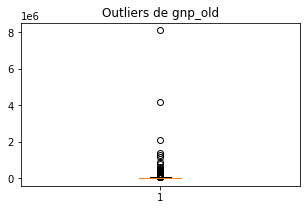

In [15]:
#Diagrama de caja: gnp_old.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["gnp_old"]) 
plt.title("Outliers de gnp_old")
plt.show() #diagrama para visualizar outliers

In [20]:
#Valores extremos: límite superior y límite inferior.
#Variable: population.
x2=copia["population"]
limiteSuperior2= x2.mean() + 2*x2.std()
limiteInferior2= x2.mean() - 2*x2.std()
print("Limite superior permitido", limiteSuperior2)
print("Limite inferior permitido", limiteInferior2)

Limite superior permitido 244113732.5648982
Limite inferior permitido -193245536.33058858


In [21]:
#Identificación de Outliers
outliers_population= copia [(x2>limiteSuperior2) | (x2<limiteInferior2)]
outliers_population

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
99,IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


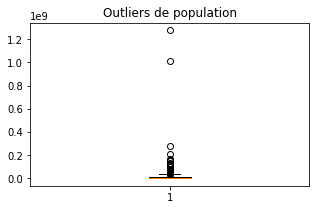

In [22]:
#Diagrama de caja: population.
fig2 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["population"]) 
plt.title("Outliers de population")
plt.show() #diagrama para visualizar outliers